#### ISAAC BYRON-BINLEY V00877670

I Isaac Byron-Binkley
acknowledge that I understand the exam rules and that I will not give or receive any aid on this exam
and that all work will be my own.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#### Question 1: Spurious Regressions and Ordinary Least Squares

Consider the classical linear econometric model. We analyze some properties of the Ordinary Least
Squares (OLS) estimator when the variables are non-stationary. We will rely on Monte Carlo simulation
methods. In terms of notation, the index t = 1, ..., T denotes the time period in our (simulated) series, and
T is the sample size.

(a) Set the sample size to T = 100. First consider two independent error terms, u
x
t and u
y
t
, both drawn
from the standard normal distribution. Then generate the explanatory variable (xt) and the error term (et)
in the equation that generates the dependent variable (yt). As initial values, use x0 = 0 and e0 = 0. For
every data point, you are asked to generate the sample using the following model, setting the true parameter
value to β = 0.7:

$$x_{t} = x_{t-1} + \mu^{x}_{t}$$
$$e_{t} = e_{t-1} + \mu^{y}_{t}$$
$$y_{t} = \beta x_{t} + e_{t}$$

(a.1) Compute the sample average and the sample standard deviation of both xt and yt. Comment.

In [2]:
seed = 10

In [3]:
np.random.seed(seed)

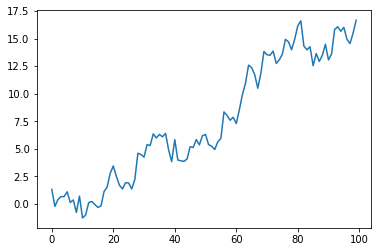

In [4]:
# Using the monte carlo simulation method that we used in class and on the assignment

beta = 0.7
ts_length = 100

x_values = []
y_values_1 = []
e_values = []
current_x = 0
current_e = 0

for i in range(ts_length):
    
    # defines the first equation for xt
    current_x = current_x + np.random.randn()
    x_values.append(current_x)
    
    # defines the second equation for error term
    current_e = current_e + np.random.randn()
    e_values.append(current_e)
    
    # defines the last equation for yt
    current_y = (beta * current_x) + current_e
    y_values_1.append(current_y)
    

plt.plot(x_values)  

In [5]:
# Computing the sample average from the simulation for xt

x_sampleavg = np.sum(x_values)/100
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/100
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: 7.454663351118797
Sample Variance xt: 30.734507909342824
Sample Standard Deviaton xt: 5.543871202448956


In [6]:
# Computing the sample average from the simulation for yt

y_sampleavg = np.sum(y_values_1)/100
print("Sample Average yt:", y_sampleavg)

y_values_1 = np.array(y_values_1)

y_samplevar=np.sum(y_values_1*y_values_1)/100
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: 6.332395276009197
Sample Variance yt: 8.076737915182754
Sample Standard Deviaton yt: 2.8419602240676687


Looking at the sample averages we can see that the sample average for xt is 7.45 and the sample average for yt = 6.3. It makes sense for xt to be larger as xt is multplied by beta (0.7) in the equation to find yt. 

(a.2) Compute βˆOLS, the OLS estimate for β.

For this I followed the simple linear regression without the intercept term formulas on wikipedia, as our formula for yt just has one regressor and an error term, no intercept

The equation for $\beta$ is as follows:

$$\hat \beta = \frac{\sum^{n}_{i} x_{i}y_{i}}{\sum^{n}_{i}  x^{2}_{i}}$$

Which simplifies too

$$\hat \beta = \frac{Cov(x,y) + (\bar x - h)(\bar y - k)}{Var(x) + (\bar x - h)^{2}}$$

We already have our estimates for $Var(x), \bar x$ and $\bar y$ from part a). Now all we have to do is solve for the corvariance between the two. The formula for the covariance is

$$Cov_{x,y} = \frac {\sum(x_{i} - \bar x)(y_{i} - \bar y)}{N -1}$$

Again we already know $\bar x, N$ and $\bar y$ from part a)

What the block of code below is designed to do is to compute random samples which are the $x_{i} and y_{i}$ values, and then subtract the corresponding average from them. I store each of those values into a variable and then multiple them together and add to a list to get x_minus_xbar_mult_y_minus_ybar

In [7]:
beta = 0.7
ts_length = 100

x_minus_xbar_mult_y_minus_ybar = []

for i in range(ts_length):
    
    current_x = x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = y_values_1[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)


Now that we have x minus xbar multiplied by y minus ybar we can finish the formula for the covariance which is sum the numerator and dividing by the the sample size minus 1

In [8]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
cov_x_y

11.080589003977137

Now that I have the covariance I can plug everything into the formula above for $\hat \beta$. Note that the values $h$ and $k$ represent a point you want the beta to pass through by I just set both to zero

In [9]:
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
b_est

0.6753425850472737

Our estimate $\beta$ on this model is 0.67

(a.3) Now set the seed to a new value, using the formula:

$$seed=seed+100$$

Create the new values for xt and yt using the same procedure as above. Redo parts (a.1) and (a.2).
Comment

In [10]:
seed = seed + 100

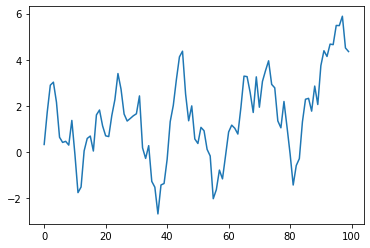

In [11]:
np.random.seed(seed)

beta = 0.7
ts_length = 100

x_values = []
y_values_1 = []
e_values = []
current_x = 0
current_e = 0

for i in range(ts_length):
    
    current_x = current_x + np.random.randn()
    x_values.append(current_x)
    
    current_e = current_e + np.random.randn()
    e_values.append(current_e)
    
    current_y = (beta * current_x) + current_e
    y_values_1.append(current_y)

plt.plot(x_values)  

In [12]:
# Computing the sample average from the simulation

x_sampleavg = np.sum(x_values)/100
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/100
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: 1.4833454594414497
Sample Variance xt: 3.316679385522994
Sample Standard Deviaton xt: 1.821175275892739


In [13]:
# Computing the sample average from the simulation

y_sampleavg = np.sum(y_values_1)/100
print("Sample Average yt:", y_sampleavg)

y_values_1 = np.array(y_values_1)

y_samplevar=np.sum(y_values_1*y_values_1)/100
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: -2.8732447361397364
Sample Variance yt: 4.816906826328031
Sample Standard Deviaton yt: 2.194745275955283


We can see that values of our sample averages for xt and yt changed drastically by using a seed of seed + 100. If we look at the plot it appears more like we would expect that as we have a fluctuating graph that is slowly trending upwards as t progresses 

Now finding the estimate of $\beta$ following the same format I did above.

In [14]:
beta = 0.7
ts_length = 100

x_minus_xbar_mult_y_minus_ybar = []

for i in range(ts_length):
    
    current_x = x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = y_values_1[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)


In [15]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
cov_x_y

2.7989131577954782

In [16]:
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
b_est

-0.26519905661261384

The estimate of B has also changed drastically to be -0.265.

(a.4) Now reset the seed to its original value, and set the sample size to T = 10, 000. Create the new
values for xt and yt using the same procedure as above. Redo parts (a.1) and (a.2). Comment on how the
results are affected by the sample size.

In [17]:
seed = 10

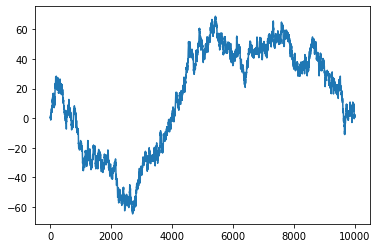

In [18]:
np.random.seed(seed)

beta = 0.7
ts_length = 10000

x_values = []
y_values_1 = []
e_values = []
current_x = 0
current_e = 0

for i in range(ts_length):
    
    current_x = current_x + np.random.randn()
    x_values.append(current_x)
    
    current_e = current_e + np.random.randn()
    e_values.append(current_e)
    
    current_y = (beta * current_x) + current_e
    y_values_1.append(current_y)
    

plt.plot(x_values)  

In [19]:
# Computing the sample average from the simulation

x_sampleavg = np.sum(x_values)/10000
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/10000
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: 13.874002340272494
Sample Variance xt: 1239.4653124247802
Sample Standard Deviaton xt: 35.20604085131954


In [20]:
# Computing the sample average from the simulation

y_sampleavg = np.sum(y_values_1)/10000
print("Sample Average yt:", y_sampleavg)

y_values_1 = np.array(y_values_1)

y_samplevar=np.sum(y_values_1*y_values_1)/10000
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: -15.002992366312744
Sample Variance yt: 3411.0529896151274
Sample Standard Deviaton yt: 58.404220648983305


In [21]:
# calculation for the covariance

beta = 0.7
ts_length = 10000

x_minus_xbar_mult_y_minus_ybar = []

for i in range(ts_length):
    
    current_x = x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = y_values_1[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

In [22]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (10000 - 1)
cov_x_y

1826.4974765500801

In [23]:
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
b_est

1.1301667296389688

We can see by increasing the sample size has changed all our numbers drastically. The changes is what we would expect though, as we are working with a non-stationary model that is growing over time. Our estimate of beta is now 1.13

(a.5) Set the sample size to T = 100. Create 500 different datasets, using a do-loop and setting the seed
to seed=seed+iter, where iter stands for the iteration number. Compute the 500 OLS estimates βˆOLS
and plot them in a histogram. Comment.

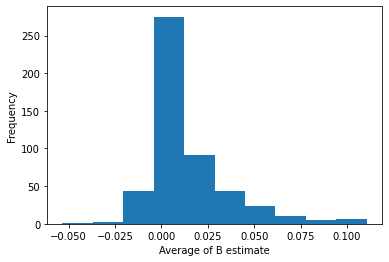

In [222]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)

    beta = 0.7
    ts_length = 100

    x_values = []
    y_values_1 = []
    current_x = 0
    current_e = 0

    # iterating through to generate the model
    for i in range(ts_length):
    
        current_x = current_x + np.random.randn()
        x_values.append(current_x)
    
        current_e = current_e + np.random.randn()
        
        current_y = (beta * current_x) + current_e
        y_values_1.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    # finding the averages to be used in the calc. of beta
    y_sampleavg = np.sum(y_values_1)/100
    
    x_sampleavg = np.sum(x_values)/100
    
    # setting up to find the covar.
    for i in range(ts_length):
    
        current_x = x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = y_values_1[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

By taking the finding the histogram of 500 samples of beta we are able to see the distribution of the estimate of beta. In this case when T=100, the average beta appears to be around 0.025

(a.6) Redo part (a.5) two more times, first with T = 200, then with T = 500. Plot the three sampling
distributions of the OLS estimator in a histogram and comment.

For T = 200

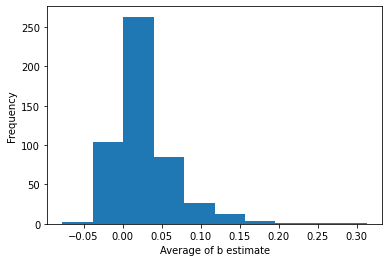

In [223]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)

    beta = 0.7
    ts_length = 200

    x_values = []
    y_values_1 = []
    current_x = 0
    current_e = 0

    # Generating our model
    for i in range(ts_length):
    
        current_x = current_x + np.random.randn()
        x_values.append(current_x)
    
        current_e = current_e + np.random.randn()
        
        current_y = (beta * current_x) + current_e
        y_values_1.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    y_sampleavg = np.sum(y_values_1)/200
    
    x_sampleavg = np.sum(x_values)/200
    
    # Finding the Covariance
    for i in range(ts_length):
    
        current_x = x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = y_values_1[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (200 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

Again we are seeing a very similar distribution of the estimate of beta when T = 200 compared to when T = 100. The distribution appears to reduce its variance and narrow in more on the true parameter value of beta which appears to be around 0.04

For T = 500

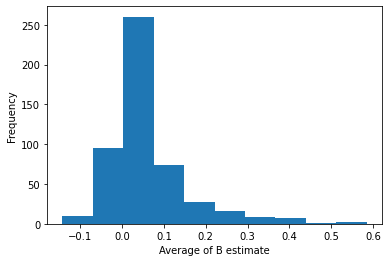

In [224]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)

    beta = 0.7
    ts_length = 500
    
    x_values = []
    y_values_1 = []
    current_x = 0
    current_e = 0

    # Generating our model
    for i in range(ts_length):
    
        current_x = current_x + np.random.randn()
        x_values.append(current_x)
    
        current_e = current_e + np.random.randn()
        
        current_y = (beta * current_x) + current_e
        y_values_1.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    # Finding the sample averages
    y_sampleavg = np.sum(y_values_1)/500
    
    x_sampleavg = np.sum(x_values)/500
    
    # Finidng the Covar.
    for i in range(ts_length):
    
        current_x = x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = y_values_1[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (500 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

When we increase T to T = 500, we again see a very similar distribution to one we saw when T = 100 and T = 200. The aveage estimate again seems to be the same. However in increasing the size we do see more outliers in the data.

(b) We redo the analysis using a different Data Generating Process.
Set the sample size to T = 100. First consider two correlated error terms, v
x
t and v
y
t
, drawn from a joint
normal distribution with zero means, unit variances, and correlation ρ = 0.7. As initial values, use v
x
0 = 0
and v
y
0 = 0. Generate the error terms for the explanatory variable (e
x
t
) and the error term for the dependent
variable (e
y
t
) using the following equations:

In [29]:
seed = 15

In [30]:
np.random.seed(seed)

In [31]:
ts_length = 100

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

e_x_values = []
e_y_values = []
current_vx = 0
current_vy = 0

# Generating our model for the error terms
for i in range(ts_length):
    
    current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
    e_x_values.append(current_vx)
    
    current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
    e_y_values.append(current_vy)
    
    joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
    current_vx = joint_dist_sample[0][0]
    current_vy = joint_dist_sample[0][1]

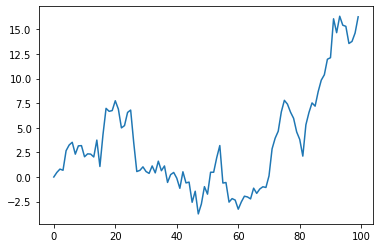

In [32]:
beta = 0.7
ts_length = 100

x_values = []
y_values = []

current_x = 0

# Generating model for xt and yt by using the error terms we found above
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_values.append(current_x)
    
    current_y = (beta * current_x) + e_y_values[i]
    y_values.append(current_y)
    
plt.plot(x_values)  

(b.1) Compute the sample average and the sample standard deviation of both xt and yt. Comment.

In [33]:
# Computing the sample average from the simulation

x_sampleavg = np.sum(x_values)/100
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/100
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: 3.452067403335871
Sample Variance xt: 25.74994867658554
Sample Standard Deviaton xt: 5.074440725497298


In [34]:
# Computing the sample average from the simulation

y_sampleavg = np.sum(y_values)/100
print("Sample Average yt:", y_sampleavg)

y_values = np.array(y_values)

y_samplevar=np.sum(y_values*y_values)/100
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: 2.592112159926785
Sample Variance yt: 18.235052831370897
Sample Standard Deviaton yt: 4.270252080541721


We can see here that the sample average is for xt is 3.45 and for yt it is 2.59. Again because of the relationship between xt and yt we expect the average value of yt to be lower than xt

(b.2) Compute the OLS estimate for βˆOLS. Comment.

In [35]:
# I will be following the same format as I did in the first part of this assignment by 
# solving for beta by using the formula to solve for a regression with an intercept

ts_length = 100

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

x_minus_xbar_mult_y_minus_ybar = []
    
current_x = 0

# Finding Covar.
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = (beta * current_x) + e_y_values[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar*y_minus_ybar)

In [36]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
cov_x_y

20.298663815404396

In [37]:
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
b_est

0.7764629156770471

The beta estimate for this model with T = 100 is 0.77

(b.3) Now set the seed to a new value, using the formula:

$$seed = seed + 100 $$

In [38]:
seed = seed + 100

In [39]:
np.random.seed(seed)

In [40]:
ts_length = 100

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

e_x_values = []
e_y_values = []
current_vx = 0
current_vy = 0

# Generating the model for the error terms
for i in range(ts_length):
    
    current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
    e_x_values.append(current_vx)
    
    current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
    e_y_values.append(current_vy)
    
    joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
    current_vx = joint_dist_sample[0][0]
    current_vy = joint_dist_sample[0][1]

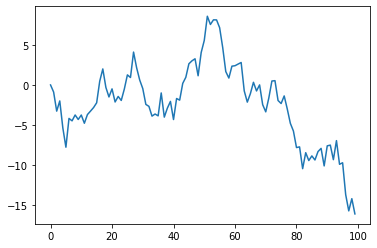

In [41]:
beta = 0.7
ts_length = 100

x_values = []
y_values = []

current_x = 0

# Adding the error terms into the model for xt and yt
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_values.append(current_x)
    
    current_y = (beta * current_x) + e_y_values[i]
    y_values.append(current_y)
    
plt.plot(x_values)  

In [42]:
# Computing the sample average from the simulation

x_sampleavg = np.sum(x_values)/100
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/100
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: -2.4026838846647505
Sample Variance xt: 25.156940526541675
Sample Standard Deviaton xt: 5.0156694993332325


In [43]:
# Computing the sample average from the simulation

y_sampleavg = np.sum(y_values)/100
print("Sample Average yt:", y_sampleavg)

y_values = np.array(y_values)

y_samplevar=np.sum(y_values*y_values)/100
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: -1.8117364687514819
Sample Variance yt: 20.871625285052808
Sample Standard Deviaton yt: 4.568547393324579


In [44]:
# Find the estimate of beta
ts_length = 100

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

x_minus_xbar_mult_y_minus_ybar = []

current_x = 0

# Finding Covar.
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = (beta * current_x) + e_y_values[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar*y_minus_ybar)

In [45]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
print('Covariance:', cov_x_y)
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
print('B estimate:',b_est)

Covariance: 20.938952192685537
B estimate: 0.817721335740042


We can see changing the seed changed all of the parameter values as it did in the first 
part of the assignment. While our beta estimate is similiar to the result with the original seed, we the sample averages of xt and yt and now negative in this model

(b.4) Now reset the seed to its original value, and set the sample size to T = 10, 000. Create the new
values for xt and yt using the same procedure as above. Redo parts (b.1) and (b.2). Comment on how the
results are affected by the sample size.

In [46]:
seed = 15

In [47]:
np.random.seed(seed)

In [48]:
ts_length = 10000

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

e_x_values = []
e_y_values = []
current_vx = 0
current_vy = 0

# Generating model for error terms.
for i in range(ts_length):
    
    current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
    e_x_values.append(current_vx)
    
    current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
    e_y_values.append(current_vy)
    
    joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
    current_vx = joint_dist_sample[0][0]
    current_vy = joint_dist_sample[0][1]

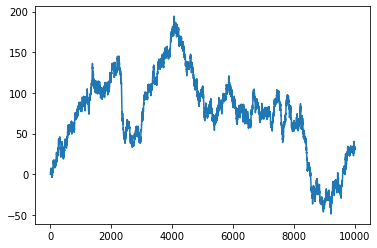

In [49]:
beta = 0.7
ts_length = 10000

x_values = []
y_values = []

current_x = 0

# Generating model in terms of xt and yt
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_values.append(current_x)
    
    current_y = (beta * current_x) + e_y_values[i]
    y_values.append(current_y)
    
plt.plot(x_values)  

In [50]:
# Computing the sample average from the simulation

x_sampleavg = np.sum(x_values)/10000
print("Sample Average xt:", x_sampleavg)

x_values = np.array(x_values)

x_samplevar=np.sum(x_values*x_values)/10000
x_samplevar=x_samplevar-x_sampleavg*x_sampleavg
print("Sample Variance xt:", x_samplevar)
print("Sample Standard Deviaton xt:", np.sqrt(x_samplevar))

Sample Average xt: 73.47537644341602
Sample Variance xt: 2465.7247939924537
Sample Standard Deviaton xt: 49.65606502726987


In [51]:
# Computing the sample average from the simulation

y_sampleavg = np.sum(y_values)/10000
print("Sample Average yt:", y_sampleavg)

y_values = np.array(y_values)

y_samplevar=np.sum(y_values*y_values)/10000
y_samplevar=y_samplevar-y_sampleavg*y_sampleavg
print("Sample Variance yt:", y_samplevar)
print("Sample Standard Deviaton yt:", np.sqrt(y_samplevar))

Sample Average yt: 51.44624138840982
Sample Variance yt: 1213.5284737788024
Sample Standard Deviaton yt: 34.835735585441604


In [52]:
# Find the estimate of beta
ts_length = 10000

mean = [0, 0]
cov = np.matrix([
    [1, 0.7], 
    [0.7, 1]
])

x_minus_xbar_mult_y_minus_ybar = []
    
current_x = 0

# Finding the covar
for i in range(ts_length):
    
    current_x = current_x + e_x_values[i]
    x_minus_xbar = current_x - x_sampleavg
    
    current_y = (beta * current_x) + e_y_values[i]
    y_minus_ybar = current_y - y_sampleavg
    
    x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar*y_minus_ybar)

In [54]:
cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (10000 - 1)
print('Covariance:', cov_x_y)
b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
print('Beta estimate:',b_est)

Covariance: 1727.2954687638246
Beta estimate: 0.7002897128774732


Because we are working with a non-stationary model similarly to the first example when we substantially increase the sample size we can expect an substantial increase in the sample averages of xt and yt and also the sample standard deviations of both. Which is exactly what we see here. Our beta estimate is again inline with our results from the previous examples

(b.5) Set the sample size to T = 100. Create 500 different datasets, using a do-loop and setting the seed
to seed=seed+iter, where iter stands for the iteration number. Compute the 500 OLS estimates βˆOLS
and plot them in a histogram. Comment.

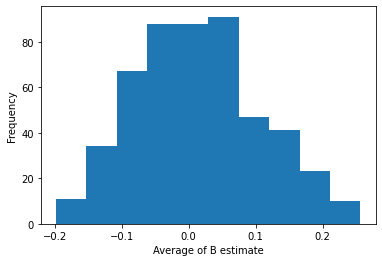

In [225]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)

    beta = 0.7
    ts_length = 100


    mean = [0, 0]
    cov = np.matrix([
        [1, 0.7], 
        [0.7, 1]
        ])
    
    e_x_values = []
    e_y_values = []
    current_vx = 0
    current_vy = 0

    # Generating our error terms
    for i in range(ts_length):
    
        current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
        e_x_values.append(current_vx)
    
        current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
        e_y_values.append(current_vy)
    
        joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
        current_vx = joint_dist_sample[0][0]
        current_vy = joint_dist_sample[0][1]
        
    x_values = []
    y_values = []

    current_x = 0

    # Generating models in terms of xt and yt
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_values.append(current_x)
    
        current_y = (beta * current_x) + e_y_values[i]
        y_values.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    # finding the sample averages
    y_sampleavg = np.sum(y_values_1)/100
    
    x_sampleavg = np.sum(x_values)/100
    
    current_x = 0
    
    # finding the covariance
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = (beta * current_x) + e_y_values[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (100 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

We can see that over T = 100 iterations the average estimate of beta appears to be around 0.

(b.6) Redo part (b.5) two more times, first with T = 200, then with T = 500. Plot the three sampling
distributions of the OLS estimator in a histogram and comment

For T = 200

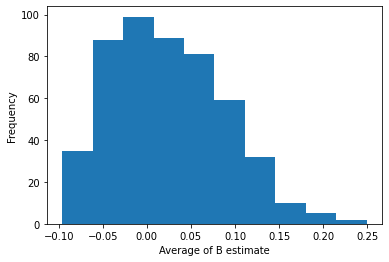

In [226]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)

    beta = 0.7
    ts_length = 200


    mean = [0, 0]
    cov = np.matrix([
        [1, 0.7], 
        [0.7, 1]
        ])
    
    e_x_values = []
    e_y_values = []
    current_vx = 0
    current_vy = 0

    # generating model for error terms
    for i in range(ts_length):
    
        current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
        e_x_values.append(current_vx)
    
        current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
        e_y_values.append(current_vy)
    
        joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
        current_vx = joint_dist_sample[0][0]
        current_vy = joint_dist_sample[0][1]
        
    x_values = []
    y_values = []

    current_x = 0

    # generating model for xt and yt
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_values.append(current_x)
    
        current_y = (beta * current_x) + e_y_values[i]
        y_values.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    # finding sample averages
    y_sampleavg = np.sum(y_values_1)/200
    
    x_sampleavg = np.sum(x_values)/200
    
    current_x = 0
    
    # finding the covariance
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = (beta * current_x) + e_y_values[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)

    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (200 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

When T = 200 we see it center even more on the true value which appears to be around 0.00

For T = 500

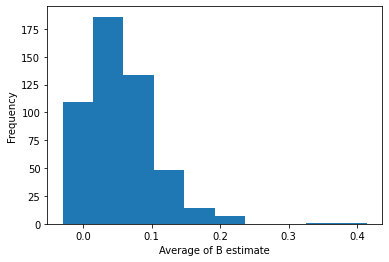

In [227]:
b_est_500 = []

seed = 10;
iter = 0;

while (iter<500):
    np.random.seed(seed)
    
    beta = 0.7
    ts_length = 500


    mean = [0, 0]
    cov = np.matrix([
        [1, 0.7], 
        [0.7, 1]
        ])
    
    e_x_values = []
    e_y_values = []
    current_vx = 0
    current_vy = 0

    # generating our error terms
    for i in range(ts_length):
    
        current_vx = 0.1*current_vx + 0.7 * current_vy + current_vx
        e_x_values.append(current_vx)
    
        current_vy = 0.4*current_vx + 0.3 * current_vy + current_vy
        e_y_values.append(current_vy)
    
        joint_dist_sample = np.random.multivariate_normal(mean, cov, 1)
        current_vx = joint_dist_sample[0][0]
        current_vy = joint_dist_sample[0][1]
        
    x_values = []
    y_values = []

    current_x = 0

    # generating our model for xt and yt
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_values.append(current_x)
    
        current_y = (beta * current_x) + e_y_values[i]
        y_values.append(current_y)
    
    x_minus_xbar_mult_y_minus_ybar = []
    
    y_sampleavg = np.sum(y_values_1)/500
    
    x_sampleavg = np.sum(x_values)/500
    
    current_x = 0
    
    # finding the covariance
    for i in range(ts_length):
    
        current_x = current_x + e_x_values[i]
        x_minus_xbar = current_x - x_sampleavg
    
        current_y = (beta * current_x) + e_y_values[i]
        y_minus_ybar = current_y - y_sampleavg
    
        x_minus_xbar_mult_y_minus_ybar.append(x_minus_xbar * y_minus_ybar)


    cov_x_y = (np.sum(x_minus_xbar_mult_y_minus_ybar)) / (500 - 1)
    
    b_est = (cov_x_y + (x_sampleavg - 0)*(y_sampleavg-0))/ (x_samplevar + (x_sampleavg-0)**2)
    
    b_est_500.append(b_est)
    
    iter+=1;
    seed+= iter; 
    
plt.hist(b_est_500)
plt.xlabel("Average of B estimate")
plt.ylabel("Frequency")
plt.show()

When T = 500 we see it center even more on the true value of around 0.05

#### Question 2: Optimal Redistribution Policies

In this question, we want to study the design of an optimal income taxation scheme, in a situation where
the tax revenues are only used to finance redistribution across different individuals.
Individuals differ in their ability, captured by the wages w that they can earn in their job (each individual
has only one job). These wages are log-normally distributed, with probability density function f(w) and
parameters µ and σ
2
: w ∼ LN(µ, σ2
).
Suppose the agents maximize their utility, which depends on two goods: (disposable) income y and
leisure l. The utility function is denoted by u(y, l) and it is assumed to be Cobb-Douglas (with parameter
0 < η < 1):
$$u(y,l) = y^{η}l^{1-η}$$
Individuals have to allocate their time between leisure and hours worked h. In particular, we normalize
the total time endowment to 1, so that the time constraint is:
$$l + h = 1$$
In order to compare different policies, we use a simple “Social Welfare Function” (SWF). In particular, we
work with the average utility (which corresponds to the aggregate utility, as we are considering a population
size equal to 1):
$$SWF = E[u(y,l)] = \int_0^∞ f(w) u(y(w), l(w))dw $$
Notice how income and leisure can potentially vary with the individuals’ wages, namely the notation
y(w) (l(w)) denotes that income (leisure) may depend on the agent’s ability.
(a) To start with, we consider a situation without a government, and with a fixed number of hours worked
$\bar h$. In this case the individuals’ budget constraint is:
$$y(w) = w \bar h$$
Compute the average utility in this economy, with different parameter values. In one case they are:
$$η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In another case they are:
$$η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In a final case they are:
$$η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

Setting up the functions we need to use Gaussian Quadrature Methods

In [63]:
def _qnwnorm1(n):
    maxit = 100
    pim4 = 1 / np.pi**(0.25)
    m = np.fix((n + 1) / 2).astype(int)
    nodes = np.zeros(n)
    weights = np.zeros(n)

    for i in range(m):
        if i == 0:
            z = np.sqrt(2*n+1) - 1.85575 * ((2 * n + 1)**(-1 / 6.1))
        elif i == 1:
            z = z - 1.14 * (n ** 0.426) / z
        elif i == 2:
            z = 1.86 * z + 0.86 * nodes[0]
        elif i == 3:
            z = 1.91 * z + 0.91 * nodes[1]
        else:
            z = 2 * z + nodes[i-2]

        its = 0

        while its < maxit:
            its += 1
            p1 = pim4
            p2 = 0
            for j in range(1, n+1):
                p3 = p2
                p2 = p1
                p1 = z * math.sqrt(2.0/j) * p2 - math.sqrt((j - 1.0) / j) * p3

            pp = math.sqrt(2 * n) * p2
            z1 = z
            z = z1 - p1/pp
            if abs(z - z1) < 1e-14:
                break

        if its == maxit:
            raise ValueError("Failed to converge in _qnwnorm1")

        nodes[n - 1 - i] = z
        nodes[i] = -z
        weights[i] = 2 / (pp*pp)
        weights[n - 1 - i] = weights[i]

    weights /= math.sqrt(math.pi)
    nodes = nodes * math.sqrt(2.0)

    return nodes, weights

In [64]:
def qnwnorm(n, mu=None, sig2=None, usesqrtm=False):
    n = np.asarray(n)
    d = n.size

    if mu is None:
        mu = np.zeros(d)
    else:
        mu = np.asarray(mu)

    if sig2 is None:
        sig2 = np.eye(d)
    else:
        sig2 = np.asarray(sig2).reshape(d, d)

    if all([x.size == 1 for x in [n, mu, sig2]]):
        nodes, weights = _qnwnorm1(n)
    else:
        nodes = []
        weights = []

        for i in range(d):
            _1d = _qnwnorm1(n[i])
            nodes.append(_1d[0])
            weights.append(_1d[1])

        nodes = gridmake(*nodes)
        weights = ckron(*weights[::-1])

    if usesqrtm:
        new_sig2 = la.sqrtm(sig2)
    else:  # cholesky
        new_sig2 = la.cholesky(sig2)

    if d > 1:
        nodes = nodes.dot(new_sig2) + mu  # Broadcast ok
    else:  # nodes.dot(sig) will not be aligned in scalar case.
        nodes = nodes * new_sig2 + mu

    return nodes.squeeze(), weights

In [65]:
def qnwlogn(n, mu=None, sig2=None):
    nodes, weights = qnwnorm(n, mu, sig2)
    return np.exp(nodes), weights

For the first case:
$$η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [204]:
# Creating a dataframe to load the results in too
df = pd.DataFrame(columns = ["case", "η", "var", "mu", "hbar", "Expected Utility"])

In [205]:
n = 100

# eta = η
eta = 0.5
var = 0.5
mu = (-var)/2
hbar = 0.4
l = 1 - hbar

w, weights = qnwlogn(n,mu,var)

# Computing the expected values given the params
expectedutility = weights@((w*hbar)**eta)*(l**(1-eta))
print("The expected utility is:", expectedutility)

The expected utility is: 0.46021653231962567


In [206]:
# Appending the variables and results into the dataframe
df = df.append({"case":1, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":expectedutility}, ignore_index=True)

For Case 2
$$η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [207]:
n = 100

eta = 0.5
var = 0.8
mu = (-var)/2
hbar = 0.4
l = 1 - hbar

w, weights = qnwlogn(n,mu,var)


#Let's compute the expected utility, given the parameter values
expectedutility = weights@(((w*hbar)**eta)*(l**(1-eta)))
print("The expected utility is:", expectedutility)

The expected utility is: 0.4432779948730976


In [208]:
# Appending the variables and results into the dataframe
df = df.append({"case":1, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":expectedutility}, ignore_index=True)

For Case 3:

$$η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

In [209]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)
ybar = np.exp(mu + var/2)
hbar = 0.4
l = 1 - hbar

w, weights = qnwlogn(n,mu,var)

expectedutility = weights@((w*hbar)**eta)*(l**(1-eta))
print("The expected utility is:", expectedutility)

The expected utility is: 0.40613966429029297


In [210]:
# Appending the variables and results into the dataframe
df = df.append({"case":1, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":expectedutility}, ignore_index=True)

In [211]:
df.head()

,case,η,var,mu,hbar,Expected Utility
0,1.0,0.5,0.5,-0.25,0.4,0.460217
1,1.0,0.5,0.8,-0.40,0.4,0.443278
2,1.0,0.5,0.5,-0.50,0.4,0.406140


Looking at the above table we notice that the expected utility was the highest when the average of the wage distribution (mu) was the highest and the variance of the wage distribution (var) which logically makes sense. The higher the average wage and the more likely you are to get that wage the happier you will be. If you increase the variance of the wage distribution because of the relationship with the average you actually decrease the average. This results in a decrease in expected utility, which again logically makes sense. However, the because decrease in expected utility comes solely from a decrease in the average of the wage distribution (mu) when we change it to -0.5

(b) Now consider a government whose task is to select the proportional tax rate τ and the transfer T.
We are dealing with the so-called “flat-tax” fiscal system. All tax revenues R are rebated with a lump-sum
transfer, which represents a source of income that is not taxed. In this case the individuals’ budget constraint
is

$$y(w) = (1-r)w\bar h + T$$

The requirement that the government balances its budget implies that:

$$T = R = \int_0^∞ f(w) r w \bar hdw  $$

Compute numerically the optimal tax rate τ
∗
, namely the tax rate that maximizes the average utility:

$$ Max \space SWF(r) = E[u(y(w),l(w))]$$

Do so for different combinations of parameter values. In one case they are:
$$η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In another case they are:
$$η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In a final case they are:
$$η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

For this question I started with the government balancing equation. Because r is just a constant we can factor it out of the integral to get 

$$T = r \int_0^∞ f(w)  w \bar hdw  $$

Now inside the integral looks very similiar to the expected utility formulas we have solved before and in the first part of this question. If we take the integral using the same method that I used in part (a) we will get some value, lets call it $\bar T$. We can now mulitply $\bar T$ by $r$ to get

$$T = \bar T r  $$

We can now plug that into the individuals budget constraint as $T$ to get 

$$y(w) = (1-r)w\bar h + \bar T r$$

Now we can plug that into our utility function as $y$ to get 

$$ u(y, l) = [(1-r)w\bar h + \bar T r ]^{η} \space l^{1-η}$$

Plugging in the the value for $\bar h $ and $l$ given $\bar h = 0.4$ for every case and $l = 1 - \bar h$  

$$ u(y, l) = [(1-r)0.4 w + \bar T r]^{η} \space 0.6^{1-η}$$

We can now take the expected utility of that using the same method as part (a) and plug in values of r to figure out what value maximize the expected utilty

In [189]:
# Creating the a dataframe to load the results in too
df_b = pd.DataFrame(columns = ["case", "T", "η", "var", "mu", "hbar", "Expected Utility", "Optimal Tax Rate (r)"])

In [190]:
# A function I wrote that iterates through the Expected Utililty and inputs different tax
# levels. It then stores and returns the maximum expected utility and corresponding tax rate
# Because the basis of each utilty function is the same formula just with different params
# we can define it in here and pass in the different params to get change the function as needed

def get_max_value(weights, w, T, l, eta):
    
    max_func_value = 0
    r_value = 0

    for r in np.linspace(0,100,100):
        r = r/100
        func_value = weights@ (((0.4*w - 0.4*w*r + T*r)**eta) * l**eta)
        
        if (func_value > max_func_value):
            max_func_value = func_value
            r_value = r 

    return round(max_func_value,3), r_value

For Case 1:
$$η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [191]:
n = 100

var = 0.5
mu = (-var)/2
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finds the value of Tbar that I talked about above. This is a function of r and gets 
# substituted into the individuals budget constraint
T = round(weights@(w*hbar),4)
T

0.4

In [192]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)/2

hbar = 0.4
l = 1 - hbar

# This peforms the integral of the individuals utility function given the parameters
w, weights = qnwlogn(n,mu,var)

In [193]:
# Passes the params and the weights and nodes into the max value function to find the 
# max expected utility.

results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.49
Optimal Tax Rate:  100.0 %
---------------------------


In [194]:
# Appending the variables and results into the dataframe
df_b = df_b.append({"case":1, "T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

For Case 2
$$η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [212]:
n = 100

var = 0.8
mu = (-var)/2
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finds the Value of Tbar
T = round(weights@(w*hbar),3)
T

0.4

In [213]:
n = 100

eta = 0.5
var = 0.8
mu = (-var)/2
hbar = 0.4
l = 1 - hbar

# This peforms the integral of the individuals utility function given the parameters
w, weights = qnwlogn(n,mu,var)

In [214]:
# Passes the params and the weights and nodes into the max value function to find the 
# max expected utility.

results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.49
Optimal Tax Rate:  100.0 %
---------------------------


In [198]:
# Appending the variables and results into the dataframe
df_b = df_b.append({"case":2, "T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

For Case 3: 
$$η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

In [199]:
n = 100

var = 0.5
mu = (-var)
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finds the value of Tbar
T = round(weights@(hbar*w),3)
T

0.312

In [200]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)
hbar = 0.4
l = 1 - hbar

# This peforms the integral of the individuals utility function given the parameters
w, weights = qnwlogn(n,mu,var)

In [201]:
#Passes the parames and the weights and nodes into the max value function to find the 
# max expected utility.

results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.433
Optimal Tax Rate:  100.0 %
---------------------------


In [202]:
# Appending the variables and results into the dataframe
df_b = df_b.append({"case":3, "T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

In [203]:
df_b

,case,T,η,var,mu,hbar,Expected Utility,Optimal Tax Rate (r)
0,1.0,0.400,0.5,0.5,-0.25,0.4,0.490,100.0
1,2.0,0.400,0.5,0.8,-0.40,0.4,0.490,100.0
2,3.0,0.312,0.5,0.5,-0.50,0.4,0.433,100.0


As we can see the results are similiar to the first part in question 2, however there is a small difference. Between case 1 and 3 decreasing the mean does still result in a decrease in expected utility even with the tax rate. The difference between the first question is that case 1 and case 2 have the same expected utility. With the government balancing equation small changes in the variance and mean don't seem to affect the overall expected utility. In all the 3 cases the tax rate that maximizes utility is a tax rate of 100.

(c) Repeat the exercise in part b, when the fiscal system is partially wasteful. The equilibrium value of
the transfer Tnew is lower than the total tax revenues R, and 0 < φ < 1 denotes a government efficiency
parameter:

$$T_{new}  = φR = φ \int f(w) r w \bar h dw $$

In this case the individuals’ budget constraint is:

$$y(w) = (1-r) w \bar h + T_{new}$$

Compute numerically the optimal tax rate $r^{*}$
, namely the tax rate that maximizes the average utility:

$$Max \space SWF(r) = E[u(y(w), l(w))]$$

Do so for different combinations of parameter values. In one case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In another case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$
In a final case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

Similar to the previous question, we will start with finding the value for $T_{new}$
Again because r is a constant we can factor it out of the integral to get

$$T_{new} = r φ \int f(w) w \bar h dw $$

Again, Now inside the integral looks very similiar to the expected utility formulas we have solved before and in the first part of this question. If we take the integral using the same method that I used in part (a) we will get $\bar T$. We can now mulitply $\bar T$ by $r$ and $φ$ to get

$$E[T] = \bar T φ r  $$

We can now plug that into the individuals budget constraint as $T$ to get 

$$y(w) = (1-r)w\bar h + \bar T r$$

Now we can plug that into our utility function as $y$ to get 

$$ u(y, l) = [(1-r)w\bar h + \bar T φ r ]^{η} \space l^{1-η}$$

Plugging in the the value for $\bar h $ and $l$ given $\bar h = 0.4$ for every case and $l = 1 - \bar h$  

$$ u(y, l) = [(1-r)0.4 w + \bar T φ r]^{η} \space 0.6^{1-η}$$

We can now take the expected utility of that using the same method as part (a) and plug in values of r to figure out what value maximize the expected utilty

For Case 1:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [161]:
# Creating the a dataframe to load the results in too
df_c = pd.DataFrame(columns = ["case","φ", "T", "η", "var", "mu", "hbar", "Expected Utility", "Optimal Tax Rate (r)"])

In [162]:
phi = 0.5 

n = 100

var = 0.5
mu = (-var)/2
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
T = round(weights@(hbar*w),3)

#multiplying it by the value of phi
T = T * phi
T

0.2

In [163]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)/2
hbar = 0.4
l = 1 - hbar

# Finding the expected value of the utility function
w, weights = qnwlogn(n,mu,var)

In [164]:
# Passing the params into the get_max_value function to find the r value that maxes
# expected utility
results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.46
Optimal Tax Rate:  0.0 %
---------------------------


In [165]:
# Appending the variables and results into the dataframe
df_c = df_c.append({"case":1,"φ": phi ,"T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

For Case 2: 
$$φ = 0.5, η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}, \bar h = 0.4.$$

In [166]:
phi = 0.5 

n = 100

var = 0.8
mu = (-var)/2
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
T = round(weights@(hbar*w),3)

#multiplying it by the value of phi
T = T * phi
T

0.2

In [167]:
n = 100

eta = 0.5
var = 0.8
mu = (-var)/2
hbar = 0.4
l = 1 - hbar

# Finding the expected value of the utility function
w, weights = qnwlogn(n,mu,var)

In [168]:
# Passing the params into the get_max_value function to find the r value that maxes
# expected utility
results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.443
Optimal Tax Rate:  0.0 %
---------------------------


In [169]:
# Appending the variables and results into the dataframe
df_c = df_c.append({"case":2,"φ": phi ,"T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

For Case 3:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = −σ^{2}, \bar h = 0.4.$$

In [170]:
phi = 0.5 

n = 100

var = 0.5
mu = (-var)
hbar = 0.4

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
T = round(weights@(hbar*w),3)

#multiplying it by the value of phi
T = T * phi
T

0.156

In [171]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)
hbar = 0.4
l = 1 - hbar

# Finding the expected value of the utility function
w, weights = qnwlogn(n,mu,var)

In [172]:
# Passing the params into the get_max_value function to find the r value that maxes
# expected utility
results = get_max_value(weights, w, T, l, eta)
print("---------------------------")
print("Expected Utility: ", results[0])
print("Optimal Tax Rate: ", results[1]*100, "%")
print("---------------------------")

---------------------------
Expected Utility:  0.406
Optimal Tax Rate:  0.0 %
---------------------------


In [173]:
# Appending the variables and results into the dataframe
df_c = df_c.append({"case":3,"φ": phi ,"T":T, "η":eta, "var":var, "mu":mu, "hbar":hbar, "Expected Utility":results[0], "Optimal Tax Rate (r)":results[1]*100}, ignore_index=True)

In [174]:
df_c

,case,φ,T,η,var,mu,hbar,Expected Utility,Optimal Tax Rate (r)
0,1.0,0.5,0.200,0.5,0.5,-0.25,0.4,0.460,0.0
1,2.0,0.5,0.200,0.5,0.8,-0.40,0.4,0.443,0.0
2,3.0,0.5,0.156,0.5,0.5,-0.50,0.4,0.406,0.0


We can see here when introducing the government efficiency parameter it reverts are answers back to the same structure that we saw in the first part of the question. The expected utility is highest when the the average of the wage distribution is the highest, and it is the lowest when the average wage distribution is the lowest. Also slightly increasing the variance as we did in case 2 results in a slight decrease in expected utility. In all the 3 cases the tax rate that maximizes utility is a tax rate of 0 .

(d) Repeat the exercise in part c, when the number of hours worked is no longer fixed. Instead, every
individual is now free to choose the hours worked that maximize their utility, h
∗
(w). In this case the
individuals’ budget constraint is:

$$y(w) = (1-r) w  h(w) + T_{new}$$

The requirement that the government balances its budget implies that:

$$T_{new}  = φR = φ \int f(w) r w h(w) dw $$

Compute numerically the optimal tax rate $r^{*}$
, namely the tax rate that maximizes the average utility:

$$Max \space SWF(r) = E[u(y(w), l(w))]$$

Do so for different combinations of parameter values. In one case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2}$$
In another case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}$$
In a final case they are:
$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = −σ^{2}$$

Again, I will start with finding the value for $T_{new}$
Again because r is a constant we can factor it out of the integral to get

$$T_{new} = r φ \int f(w) w h(w) dw $$

Also we dont know the individuals h(w) function so we cant take the expected value of it but what we can do is we know that no matter what their hours are they are subject to the expression

$$h = 1 - l$$

We can substitute that value into the integral instead of h(w) and because it is just a constant we can also factor it out to get

$$T_{new} = r φ (1 - l) \int f(w) w  dw $$

Now we can take the expected value of that integral as we did before to get $\bar T$

$$T_{new} = r φ (1 - l) \bar T$$

We can now sub that into the individual budget constraint to get

$$y(w) = (1-r) w h(w) + r φ (1 - l) \bar T$$

which can be rearranged too

$$y(w) = w(1-r)(1-l)  + r φ (1 - l) \bar T$$

That can now be substituted into the utiltiy function as y(w)

$$u(y,l) = [w(1-r)(1-l)  + r φ (1 - l) \bar T]^{η} * l^{1-η}$$

For the first case:

$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = \frac {−σ^{2}}{2} $$

In [148]:
phi = 0.5 

n = 100

var = 0.5
mu = (-var)/2

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
result = weights@w

print(result)

#multiplying it by the value of phi
T = result * phi
T

0.9999999999999953


0.49999999999999767

In [149]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)/2
hbar = 0.4
l = 1 - hbar


w, weights = qnwlogn(n,mu,var)

For the next part what I did was expand the utility function. Now we have a function with three variables and two unknowns, the tax rate (r) and the amount of leisure (l).
I wasn't really sure what to do at this point, but this resembles a similiar question we worked on before so what I tried to do was run the nelder-mead algorithm on the utility function to find the values of $r$ and $l$ that maximize it.

In [215]:
def f(x):
    return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + 0.5*x[1] - 0.5*x[1]*x[0])**(1/2)) * x[0]**(1/2))

In [216]:
from scipy.optimize import minimize

minimize(f,[1,0], method='Nelder-Mead')

<ipython-input-215-b81f1eeb2034>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + 0.5*x[1] - 0.5*x[1]*x[0])**(1/2)) * x[0]**(1/2))


 final_simplex: (array([[5.00049438e-01, 2.71529425e-08],
       [4.99972260e-01, 2.32428312e-07],
       [5.00098605e-01, 5.14222309e-07]]), array([-0.45241871, -0.45241869, -0.45241867]))
           fun: -0.4524187052457928
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 43
        status: 0
       success: True
             x: array([5.00049438e-01, 2.71529425e-08])

In [152]:
import copy

def nelder_mead(f, x_start,
                step=0.1, no_improve_thr=10e-6,
                no_improv_break=10, max_iter=0,
                alpha=1., gamma=2., rho=-0.5, sigma=0.5):
    '''
    @param f (function): function to optimize, must return a scalar score
        and operate over a numpy array of the same dimensions as x_start
    @param x_start (numpy array): initial position
    @param step (float): look-around radius in initial step
    @no_improv_thr,  no_improv_break (float, int): break after no_improv_break iterations with
        an improvement lower than no_improv_thr
    @max_iter (int): always break after this number of iterations.
        Set it to 0 to loop indefinitely.
    @alpha, gamma, rho, sigma (floats): parameters of the algorithm
        (see Wikipedia page for reference)
    return: tuple (best parameter array, best score)
    '''
    # init
    dim = len(x_start)
    prev_best = f(x_start)
    no_improv = 0
    res = [[x_start, prev_best]]

    for i in range(dim):
        x = copy.copy(x_start)
        x[i] = x[i] + step
        score = f(x)
        res.append([x, score])

    # simplex iter
    iters = 0
    while 1:
        # order
        res.sort(key=lambda x: x[1])
        best = res[0][1]

        # break after max_iter
        if max_iter and iters >= max_iter:
            return res[0]
        iters += 1

        # break after no_improv_break iterations with no improvement
        print('...best so far:', best)

        if best < prev_best - no_improve_thr:
            no_improv = 0
            prev_best = best
        else:
            no_improv += 1

        if no_improv >= no_improv_break:
            return res[0]

        # centroid
        x0 = [0.] * dim
        for tup in res[:-1]:
            for i, c in enumerate(tup[0]):
                x0[i] += c / (len(res)-1)

        # reflection
        xr = x0 + alpha*(x0 - res[-1][0])
        rscore = f(xr)
        if res[0][1] <= rscore < res[-2][1]:
            del res[-1]
            res.append([xr, rscore])
            continue

        # expansion
        if rscore < res[0][1]:
            xe = x0 + gamma*(x0 - res[-1][0])
            escore = f(xe)
            if escore < rscore:
                del res[-1]
                res.append([xe, escore])
                continue
            else:
                del res[-1]
                res.append([xr, rscore])
                continue

        # contraction
        xc = x0 + rho*(x0 - res[-1][0])
        cscore = f(xc)
        if cscore < res[-1][1]:
            del res[-1]
            res.append([xc, cscore])
            continue

        # reduction
        x1 = res[0][0]
        nres = []
        for tup in res:
            redx = x1 + sigma*(tup[0] - x1)
            score = f(redx)
            nres.append([redx, score])
        res = nres


In [145]:
# Trying the nelder mead function above with f
nelder_mead(f, np.array([0., 0.]))

...best so far: -0.24870873545411906
...best so far: -0.24870873545411906
...best so far: -0.31914666390405133
...best so far: -0.40175026274215875
...best so far: -0.40706854202097525
...best so far: -0.40706854202097525
...best so far: -0.41012439401055445
...best so far: -0.41012439401055445
...best so far: -0.41012439401055445
...best so far: -0.41083562892375936
...best so far: -0.4117503349114381
...best so far: -0.412130754406266
...best so far: -0.41334709282809984
...best so far: -0.41339447817600583
...best so far: -0.41339447817600583
...best so far: -0.4140674551236197
...best so far: -0.4140674551236197
...best so far: -0.4140674551236197
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.4145119452705878
...best 

<ipython-input-138-7f9c844611e4>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + T*x[1] - T*x[1]*x[0])**(1/2)) * x[0]**(1/2))


[array([5.01343250e-01, 1.50680542e-05]), -0.4145119452705878]

For the second case:

$$φ = 0.5, η = 0.5, σ^{2} = 0.8, µ = \frac {−σ^{2}}{2}$$

In [153]:
phi = 0.5 

n = 100

var = 0.8
mu = (-var)/2

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
result = weights@w

#multiplying it by the value of phi
T = result * phi
T

0.49999999999999756

In [154]:
n = 100

eta = 0.5
var = 0.8
mu = (-var)/2
hbar = 0.4
l = 1 - hbar


w, weights = qnwlogn(n,mu,var)

In [155]:
minimize(f,[1,0], method='Nelder-Mead')

<ipython-input-150-7f9c844611e4>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + T*x[1] - T*x[1]*x[0])**(1/2)) * x[0]**(1/2))


 final_simplex: (array([[5.00049438e-01, 2.71529425e-08],
       [4.99972260e-01, 2.32428312e-07],
       [5.00098605e-01, 5.14222309e-07]]), array([-0.45241871, -0.45241869, -0.45241867]))
           fun: -0.4524187052457928
       message: 'Optimization terminated successfully.'
          nfev: 80
           nit: 43
        status: 0
       success: True
             x: array([5.00049438e-01, 2.71529425e-08])

In [156]:
# Trying the nelder mead function above with f
nelder_mead(f, np.array([0., 0.]))

...best so far: -0.2714512254107867
...best so far: -0.2714512254107867
...best so far: -0.349632265961932
...best so far: -0.43876968720679516
...best so far: -0.44621839221612636
...best so far: -0.44621839221612636
...best so far: -0.44847972650208906
...best so far: -0.44847972650208906
...best so far: -0.44847972650208906
...best so far: -0.4493964832304531
...best so far: -0.44983432521508715
...best so far: -0.45039214894867313
...best so far: -0.4511444869972122
...best so far: -0.4513421064439414
...best so far: -0.45150906682172187
...best so far: -0.4520495478766179
...best so far: -0.4520495478766179
...best so far: -0.4520495478766179
...best so far: -0.4520495478766179
...best so far: -0.45219456497969546
...best so far: -0.45219456497969546
...best so far: -0.45227057945631205
...best so far: -0.45227057945631205
...best so far: -0.45235270985396064
...best so far: -0.45235270985396064
...best so far: -0.45235270985396064
...best so far: -0.45235270985396064
...best so f

<ipython-input-150-7f9c844611e4>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + T*x[1] - T*x[1]*x[0])**(1/2)) * x[0]**(1/2))


[array([4.99724057e-01, 1.44623598e-05]), -0.4524178088579731]

For case 3:

$$φ = 0.5, η = 0.5, σ^{2} = 0.5, µ = −σ^{2}$$

In [217]:
phi = 0.5 

n = 100

var = 0.5
mu = (-var)

w, weights = qnwlogn(n,mu,var)

# Finding the expected value of Tbar
result = weights@w

#multiplying it by the value of phi
T = result * phi
T

0.3894003915357006

In [218]:
n = 100

eta = 0.5
var = 0.5
mu = (-var)
hbar = 0.4
l = 1 - hbar


w, weights = qnwlogn(n,mu,var)

In [219]:
def f(x):
    return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + 0.389*x[1] - 0.389*x[1]*x[0])**(1/2)) * x[0]**(1/2))

In [220]:
minimize(f,[1,0], method='Nelder-Mead')

<ipython-input-219-df1d8bd12234>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + 0.389*x[1] - 0.389*x[1]*x[0])**(1/2)) * x[0]**(1/2))


 final_simplex: (array([[ 5.00781250e-01, -1.95312500e-06],
       [ 5.00703305e-01,  2.27996613e-06],
       [ 5.00689439e-01,  3.07124566e-06]]), array([-0.4145142 , -0.41451398, -0.41451394]))
           fun: -0.41451419827067
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 35
        status: 0
       success: True
             x: array([ 5.0078125e-01, -1.9531250e-06])

In [160]:
# Trying the nelder mead function above with f
nelder_mead(f, np.array([0., 0.]))

...best so far: -0.24870873545411906
...best so far: -0.24870873545411906
...best so far: -0.31914666390405133
...best so far: -0.40175026274215875
...best so far: -0.40706854202097525
...best so far: -0.40706854202097525
...best so far: -0.41012439401055445
...best so far: -0.41012439401055445
...best so far: -0.41012439401055445
...best so far: -0.41083562892375936
...best so far: -0.4117503349114381
...best so far: -0.412130754406266
...best so far: -0.41334709282809984
...best so far: -0.41339447817600583
...best so far: -0.41339447817600583
...best so far: -0.4140674551236197
...best so far: -0.4140674551236197
...best so far: -0.4140674551236197
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41434162119087675
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.41446904938485435
...best so far: -0.4145119452705878
...best 

<ipython-input-150-7f9c844611e4>:2: RuntimeWarning: invalid value encountered in sqrt
  return -(weights @ ((w-w*x[0] - w*x[1] + w*x[0]*x[1] + T*x[1] - T*x[1]*x[0])**(1/2)) * x[0]**(1/2))


[array([5.01343250e-01, 1.50680542e-05]), -0.4145119452705878]

Every equation is returning the same result, but according to the algorithm before it encounters an error the optimal values that maximize the function are a value of 0.5 for l (leisure) which would make the value for h (hours worked) .5 as well. Then for every result its giving that the optimal tax is 0 in order to maximize utility.

In [228]:
!jupyter-nbconvert --to PDFviaHTML 457_FINAL_BYRON_BINKLEY_ISAAC_V00877670.pdf

[NbConvertApp] WARNING | pattern '457_FINAL.pdf' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout in